🚨 Note: after installation is complete (it make take a few minutes), you'll need to restart the runtime after installation completes. 

In [1]:
# py -3.10 -m venv myvenv
# myvenv\Scripts\activate


# !pip install super-gradients==3.1.0
# !pip install imutils
# !pip install roboflow
# !pip install pytube --upgrade

In [2]:
import torch
torch.__version__


'1.12.1+cu116'

In [3]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3090'

# 🦸🏾‍♂️ SuperGradients 

SuperGradients is a PyTorch based training library.

It provides a uniform interface for the most common computer vision use cases: 

- Classification

- Detection

- Segmentation

- Pose estimation

There are nearly 40 pretrained models in our model zoo. You can see the pretrained models available to you by following [this link](https://github.com/Deci-AI/super-gradients/blob/master/documentation/source/model_zoo.md).

This notebook will focus on using SuperGradients with YOLO-NAS. 

# Inference with YOLONAS pretrained models


YOLONAS comes in three flavors: `yolo_nas_s`, `yolo_nas_m`, and `yolo_nas_l`.

In [4]:
from super_gradients.training import models

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

You can run the following cell if you're interested in the architecture:

In [5]:
# !pip install torchinfo

# from torchinfo import summary

# summary(model=yolo_nas_l, 
#         input_size=(16, 3, 640, 640),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"]
# )

## Inference on an image

Once the model has been instantiated all you have to do is call the `predict` method. 

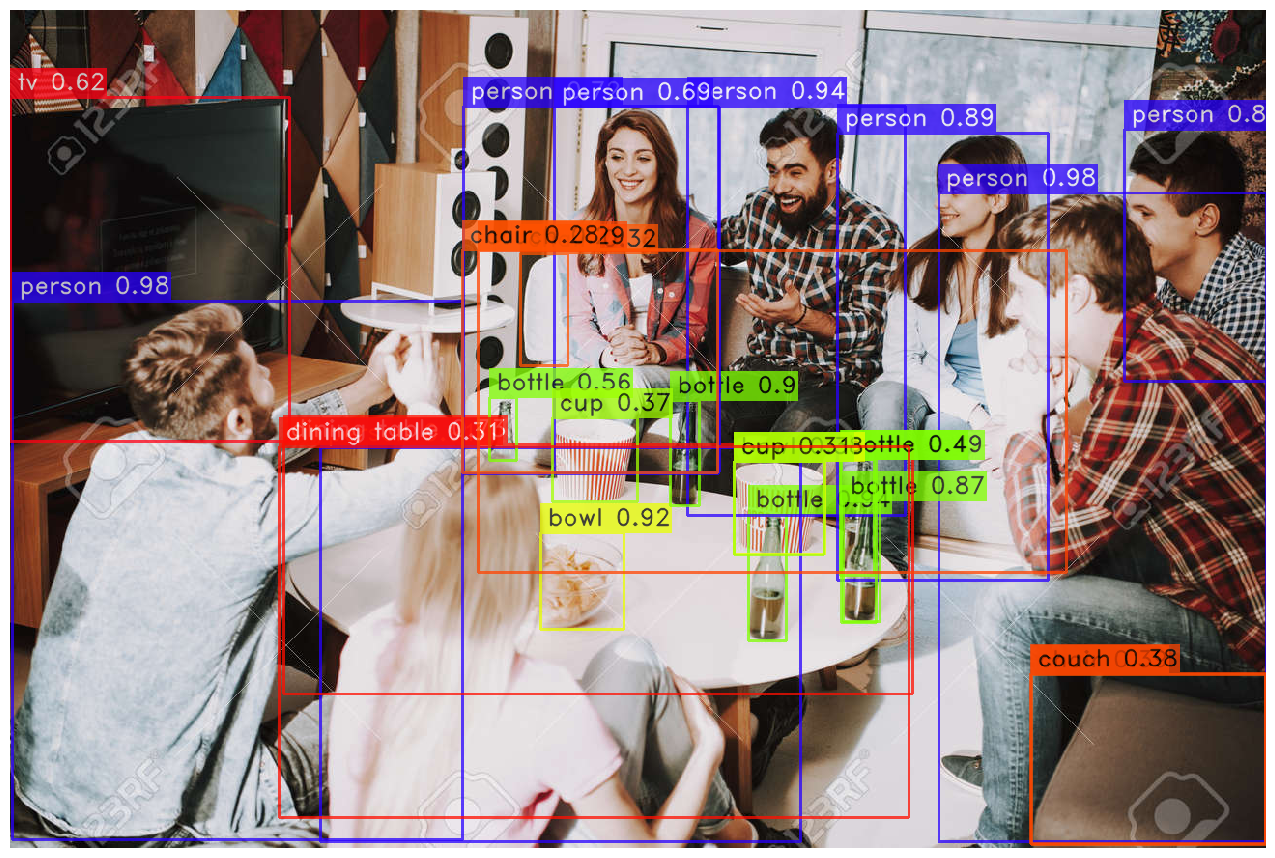

In [7]:
url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
yolo_nas_l.predict(url, conf=0.25).show()

# 🎥 Inference on video


In [10]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [12]:
input_video_path = "walk.mp4"
output_video_path = "detections.mp4"
device=0

yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|████████████████████████████████████████████████████████████| 1723/1723 [00:52<00:00, 32.97it/s]


### 💻 Inference via webcam


In [1]:
import torch
from super_gradients.common.object_names import Models
from super_gradients.training import models

# Note that currently only YoloX and PPYoloE are supported.
model = models.get(Models.YOLOX_N, pretrained_weights="coco")

# We want to use cuda if available to speed up inference.
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

model.predict_webcam()